In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "cnn"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [2]:
def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

def plot_color_image(image):
    plt.imshow(image.astype(np.uint8),interpolation="nearest")
    plt.axis("off")

In [3]:
import tensorflow as tf

In [34]:
width = 299
height = 299
channels = 3

## Read image

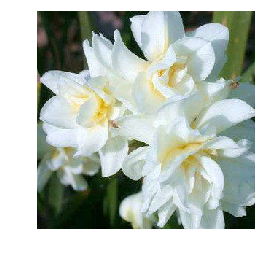

<class 'numpy.ndarray'> (299, 299, 3)


In [122]:
import matplotlib.image as mpimg
test_image = mpimg.imread(r"C:\Users\asiaynrf\Desktop\fun\handson_ML\image\Gardenia flower.jpg")[:width, :height,:channels]
image_shape = test_image.shape
plt.imshow(test_image)
plt.axis("off")
plt.show()
print (type (test_image), image_shape)

## Reshape the image and let it fit the module input

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


255 0


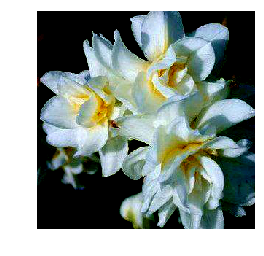

1.0 -1.0


In [123]:
max_val = np.amax(test_image)
min_val = np.amin(test_image)
print (max_val, min_val)
test_image_01 = (test_image / max_val) * 2 - 1
plt.imshow(test_image_01)
plt.axis("off")
plt.show()
max_val = np.amax(test_image_01)
min_val = np.amin(test_image_01)
print (max_val, min_val)

In [124]:
import sys
import tarfile
from six.moves import urllib

TF_MODELS_URL = "http://download.tensorflow.org/models"
INCEPTION_V3_URL = TF_MODELS_URL + "/inception_v3_2016_08_28.tar.gz"
INCEPTION_PATH = os.path.join("datasets", "inception")
INCEPTION_V3_CHECKPOINT_PATH = os.path.join(INCEPTION_PATH, "inception_v3.ckpt")

def download_progress(count, block_size, total_size):
    percent = count * block_size * 100 // total_size
    sys.stdout.write("\rDownloading: {}%".format(percent))
    sys.stdout.flush()

def fetch_pretrained_inception_v3(url=INCEPTION_V3_URL, path=INCEPTION_PATH):
    if os.path.exists(INCEPTION_V3_CHECKPOINT_PATH):
        return
    os.makedirs(path, exist_ok=True)
    tgz_path = os.path.join(path, "inception_v3.tgz")
    urllib.request.urlretrieve(url, tgz_path, reporthook=download_progress)
    inception_tgz = tarfile.open(tgz_path)
    inception_tgz.extractall(path=path)
    inception_tgz.close()
    os.remove(tgz_path)

In [125]:
fetch_pretrained_inception_v3()

In [126]:
import re

CLASS_NAME_REGEX = re.compile(r"^n\d+\s+(.*)\s*$", re.M | re.U)

def load_class_names():
    with open(os.path.join("datasets", "inception", "imagenet_class_names.txt"), "rb") as f:
        content = f.read().decode("utf-8")
        return CLASS_NAME_REGEX.findall(content)

In [127]:
class_names = ["background"] + load_class_names()

In [128]:
class_names[:5]

['background',
 'tench, Tinca tinca\r',
 'goldfish, Carassius auratus\r',
 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias\r',
 'tiger shark, Galeocerdo cuvieri\r']

In [129]:
from tensorflow.contrib.slim.nets import inception
import tensorflow.contrib.slim as slim

reset_graph()

X = tf.placeholder(tf.float32, shape=[None, 299, 299, 3], name="X")
with slim.arg_scope(inception.inception_v3_arg_scope()):
    logits, end_points = inception.inception_v3(
        X, num_classes=1001, is_training=False)
predictions = end_points["Predictions"]
saver = tf.train.Saver()

In [130]:
with tf.Session() as sess:
    saver.restore(sess, INCEPTION_V3_CHECKPOINT_PATH)
    # ...

INFO:tensorflow:Restoring parameters from datasets\inception\inception_v3.ckpt


In [131]:
X_test = test_image_01.reshape(-1, height, width, channels)

with tf.Session() as sess:
    saver.restore(sess, INCEPTION_V3_CHECKPOINT_PATH)
    predictions_val = predictions.eval(feed_dict={X: X_test})

INFO:tensorflow:Restoring parameters from datasets\inception\inception_v3.ckpt


In [132]:
most_likely_class_index = np.argmax(predictions_val[0])
most_likely_class_index

739

In [133]:
class_names[most_likely_class_index]

'pot, flowerpot\r'

In [135]:
top_5 = np.argpartition(predictions_val[0], -5)[-5:]
top_5 = reversed(top_5[np.argsort(predictions_val[0][top_5])])
for i in top_5:
    print('curr_predict    :  ' + str(class_names[i]))
    print ('curr_condidence:  ' + str(100 * predictions_val[0][i]))

curr_predict    :  pot, flowerpot
curr_condidence:  33.89211893081665
curr_predict    :  bee
curr_condidence:  20.346802473068237
curr_predict    :  vase
curr_condidence:  8.705424517393112
curr_predict    :  daisy
curr_condidence:  8.129718899726868
curr_predict    :  fly
curr_condidence:  2.673276886343956


## Transfer learning

Step1: load the data

In [170]:
import sys
import tarfile
from six.moves import urllib

In [176]:
reset_graph ()
Flower_URL = "http://goo.gl/EgJVXZ"
Flower_path = os.path.join (r'C:\Users\asiaynrf\Desktop\fun\resource\datasets','flower')
def fetch_flower (url = Flower_URL, path = Flower_path):
    if os.path.exists (Flower_path):
        return
    os.makedirs (path, exist_ok = True)
    tgz_path = os.path.join (path, "flower_pics.tgz")
    urllib.request.urlretrieve (url, tgz_path, reporthook = download_progress)
    flower_tgz = tarfile.open (tgz_path)
    flower_tgz.extractall (path = path)
    flower_tgz.close ()
    os.remove (tgz_path)
        

In [177]:
fetch_flower ()

Downloading: 100%

In [178]:
flower_root_path = os.path.join (Flower_path, 'flower_photos')
file_name_list = sorted ([dirname for dirname in os.listdir (flower_root_path)])
flower_classes = file_name_list[1:]

In [179]:
print (flower_classes)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [180]:
from collections import defaultdict

image_path = defaultdict (list)

for flower_class in flower_classes:
    image_dir = os.path.join (flower_root_path, flower_class)
    for file_path in os.listdir (image_dir):
        if file_path.endswith ('.jpg'):
            image_path [flower_class].append (os.path.join (image_dir, file_path))

In [186]:
import matplotlib.image as mping

for flower_class in flower_classes:
    print ("class:", flower_class)
    image = mpimg.imread (image_path [flower_class][1])
    print (image.shape)
#     plt.imshow(image)
#     plt.axis("off")
#     plt.show()


class: daisy
(313, 500, 3)
class: dandelion
(218, 320, 3)
class: roses
(240, 320, 3)
class: sunflowers
(240, 320, 3)
class: tulips
(335, 500, 3)


## Reshape Image to make it 299 * 299 and input value within - 1, 1

In [198]:
height, weight = 299, 299

In [199]:
from scipy.misc import imresize

def prepare_image(image, target_width = 299, target_height = 299, max_zoom = 0.2):
    """Zooms and crops the image randomly for data augmentation."""

    # First, let's find the largest bounding box with the target size ratio that fits within the image
    height = image.shape[0]
    width = image.shape[1]
    image_ratio = width / height
    target_image_ratio = target_width / target_height
    crop_vertically = image_ratio < target_image_ratio
    crop_width = width if crop_vertically else int(height * target_image_ratio)
    crop_height = int(width / target_image_ratio) if crop_vertically else height
        
    # Now let's shrink this bounding box by a random factor (dividing the dimensions by a random number
    # between 1.0 and 1.0 + `max_zoom`.
    resize_factor = np.random.rand() * max_zoom + 1.0
    crop_width = int(crop_width / resize_factor)
    crop_height = int(crop_height / resize_factor)
    
    # Next, we can select a random location on the image for this bounding box.
    x0 = np.random.randint(0, width - crop_width)
    y0 = np.random.randint(0, height - crop_height)
    x1 = x0 + crop_width
    y1 = y0 + crop_height
    
    # Let's crop the image using the random bounding box we built.
    image = image[y0:y1, x0:x1]

    # Let's also flip the image horizontally with 50% probability:
    if np.random.rand() < 0.5:
        image = np.fliplr(image)

    # Now, let's resize the image to the target dimensions.
    image = imresize(image, (target_width, target_height))
    
    # Finally, let's ensure that the colors are represented as
    # 32-bit floats ranging from 0.0 to 1.0 (for now):
    return image.astype(np.float32) / 255

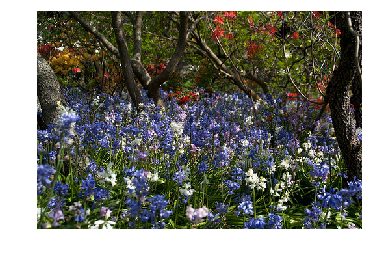

In [200]:
image = mpimg.imread (image_path [flower_class][1])
plt.imshow(image)
plt.axis("off")
plt.show()

C:\Users\asiaynrf\AppData\Local\Continuum\anaconda2\envs\tensorflow3\lib\site-packages\ipykernel_launcher.py:35: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


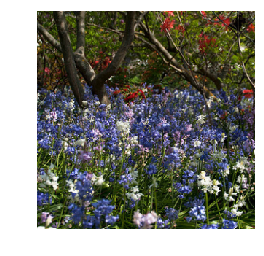

In [201]:
image_reshaped = prepare_image (image)
plt.imshow(image_reshaped)
plt.axis("off")
plt.show()

## associate the image with the label

## Fronzen the CNN layer, change the output layer and see the performance